In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')
df=data.copy()

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
data['ZIP Code'].nunique()

467

**Univariate Analysis**

**Income**

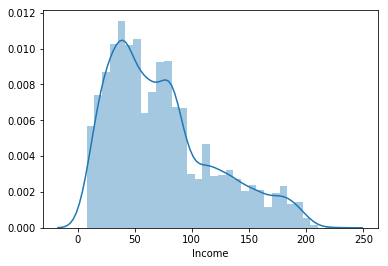

In [7]:
# sns.boxplot(data.Income)
sns.distplot(data.Income)
plt.show()

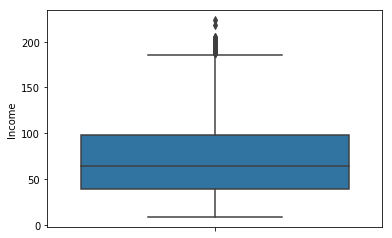

In [8]:
sns.boxplot(y=data.Income)
plt.show()

Most of the persons income lie between 39-78 million.There are few customers in bank who are outliers

In [9]:
data.Income.median()

64.0

In [10]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

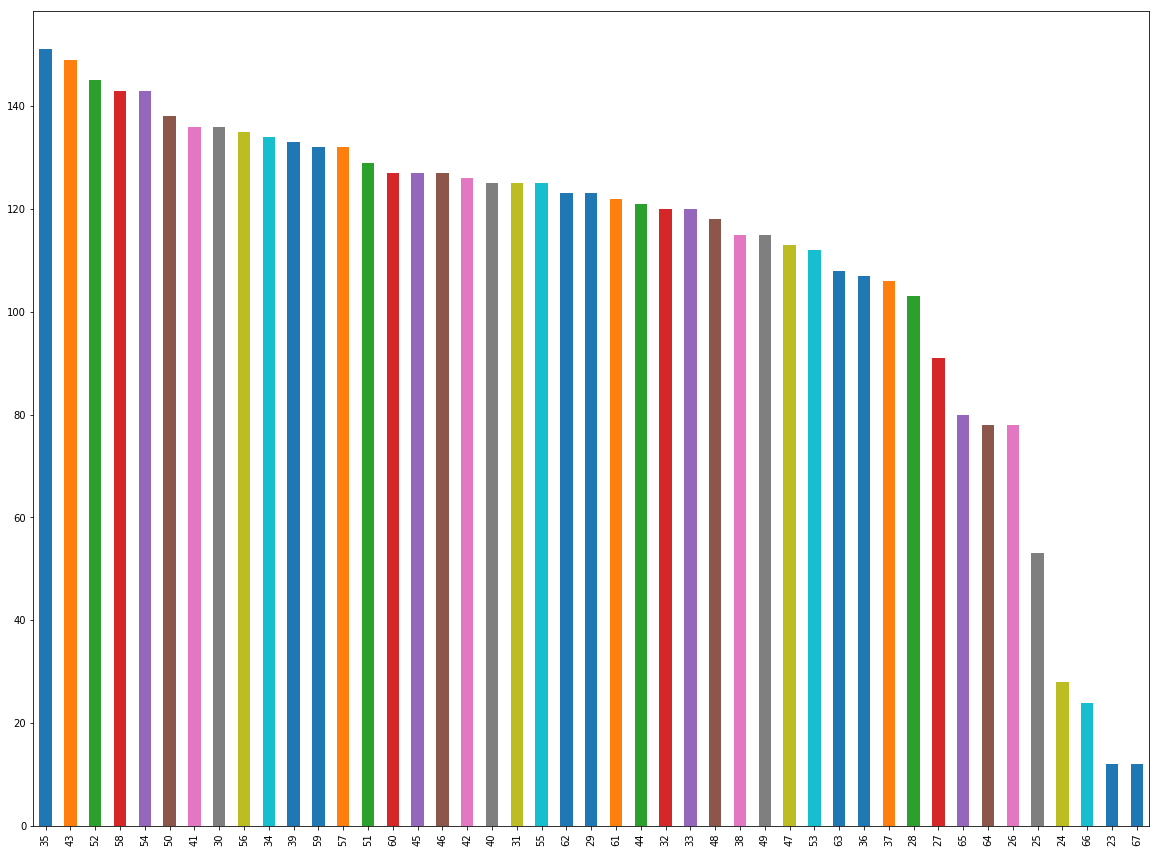

In [11]:
plt.figure(figsize=(20,15))
data['Age'].value_counts().sort_values(ascending=False).plot(x='Age',kind='bar')
plt.show()

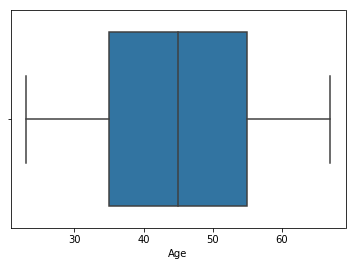

In [12]:
sns.boxplot(data.Age)
plt.show()

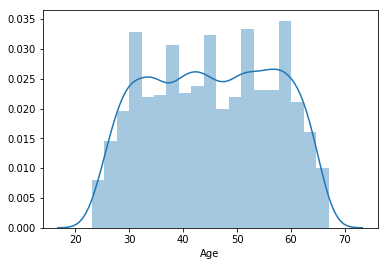

In [13]:
sns.distplot(data.Age)

Majority of customers fall between 30 to 60 years of age.

In [14]:
data[data['Experience']<0].Experience.count()

52

In [15]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Missing value imputation**

In [16]:
#clean the negative variable
dfExp = data.loc[data['Experience'] >=0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [17]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [18]:
df_filtered = dfExp[(df.Age == 24) & (df.Education == 2)]
df_filtered

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
105,106,24,0,35,94704,3,0.1,2,0,0,1,0,1,0
3908,3909,24,0,44,90638,3,0.1,2,0,0,0,0,0,0


In [19]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [20]:
df[data.Experience.isna()==True]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
670,671,23,-1,61,92374,4,2.600000,1,239,0,0,0,1,0
909,910,23,-1,149,91709,1,6.333333,1,305,0,0,0,0,1
2430,2431,23,-1,73,92120,4,2.600000,1,0,0,0,0,1,0
2618,2619,23,-3,55,92704,3,2.400000,2,145,0,0,0,1,0
2717,2718,23,-2,45,95422,4,0.600000,2,0,0,0,0,1,1
2962,2963,23,-2,81,91711,2,1.800000,2,0,0,0,0,0,0
3130,3131,23,-2,82,92152,2,1.800000,2,0,0,1,0,0,1
3157,3158,23,-1,13,94720,4,1.000000,1,84,0,0,0,1,0
3425,3426,23,-1,12,91605,4,1.000000,1,90,0,0,0,1,0
3824,3825,23,-1,12,95064,4,1.000000,1,0,0,1,0,0,1


In [21]:
data.fillna(value=0,inplace=True)
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [22]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.123000,11.434860,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Experience**

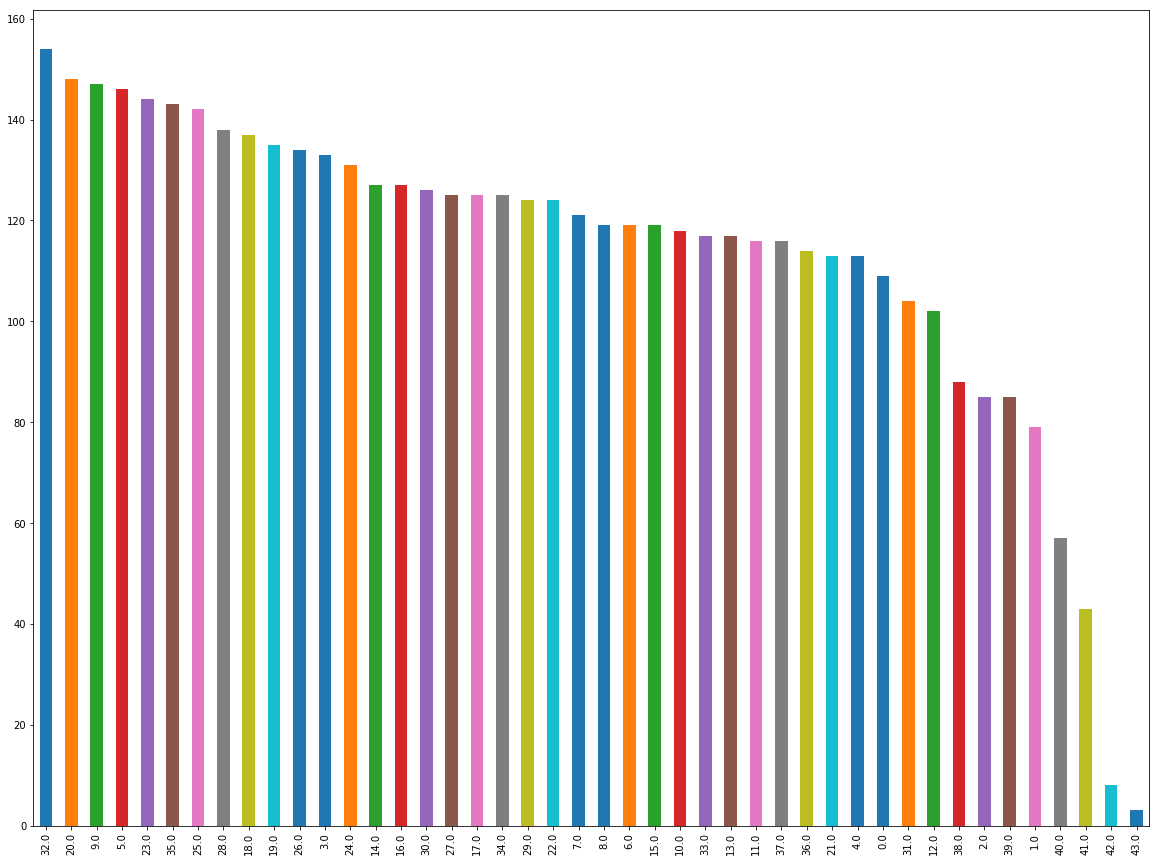

In [23]:
plt.figure(figsize=(20,15))
data['Experience'].value_counts().sort_values(ascending=False).plot(x='Age',kind='bar')
plt.show()

most of the people in the bank are of 32,20,9 years of experience

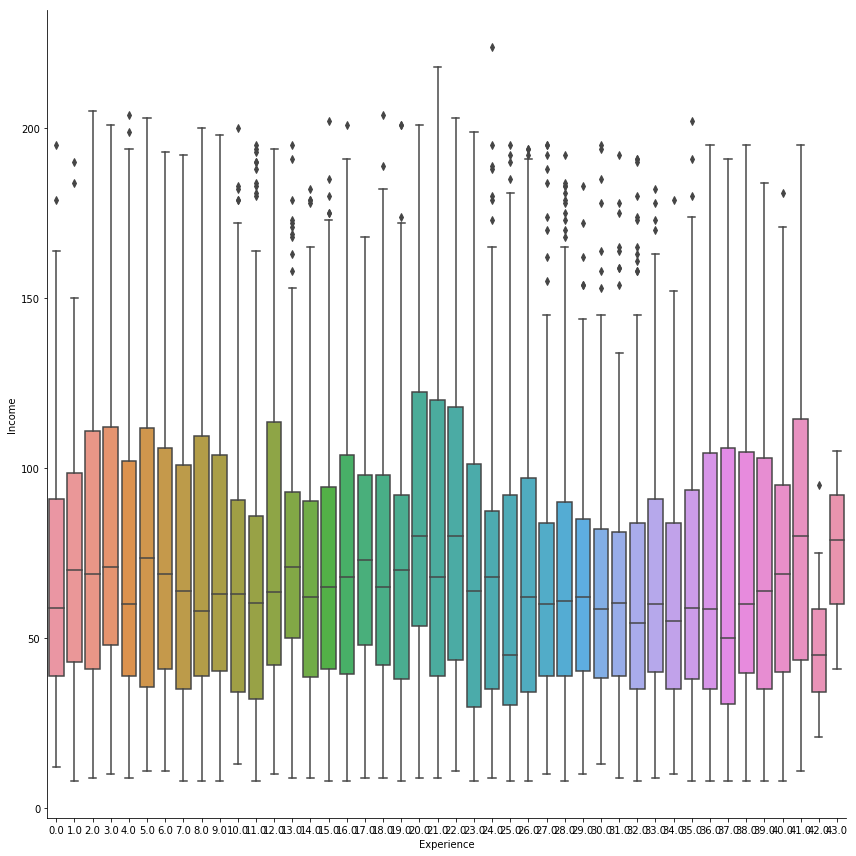

In [24]:
mx = sns.factorplot(x="Experience", y="Income", data=data,kind="box",size=12 ,aspect=1)
mx.set(xlabel='Experience')
mx.set(ylabel= 'Income')

In [25]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [26]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


**Mortgage**

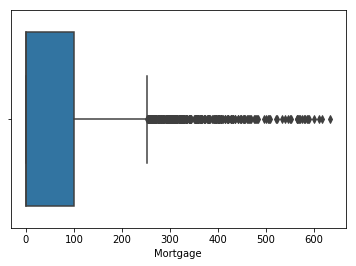

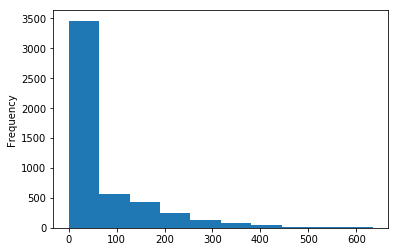

In [28]:
sns.boxplot(data.Mortgage)
plt.show()
plt.figure()
data.Mortgage.plot(x='Mortgage',kind='hist')
plt.show()

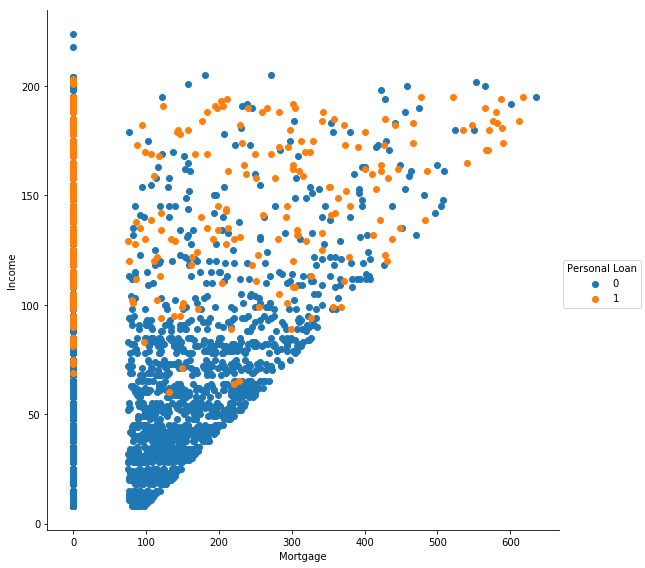

In [29]:
sns.FacetGrid(data,hue='Personal Loan',size=8)\
    .map(plt.scatter,"Mortgage","Income")\
    .add_legend()

We could see a large number of people who have taken loan have martgage 0 and income more than 70(approx).

In [30]:
data[(data.Income>50) & (data['Personal Loan'] ==1) &(data['Mortgage']==0)].Mortgage.count()/data[(data.Income>50) & (data['Personal Loan'] ==1)].Income.count()

0.65

In [31]:
data[(data['Mortgage']==0)].Mortgage.count()

3462

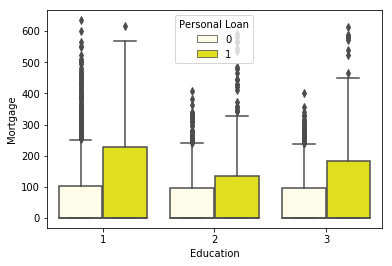

In [32]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='yellow')
plt.show()

Inference : From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

**Observation:**
- We observed that people having income more than 50 thousand dollars have taken personal loan.
- Out of people who have taken loan and have income more than 50 thousand dollars,65% of them do not have any mortgage value.
- We observe a linear trend with income for the people who have house mortgage value 

**CC Avg spending**

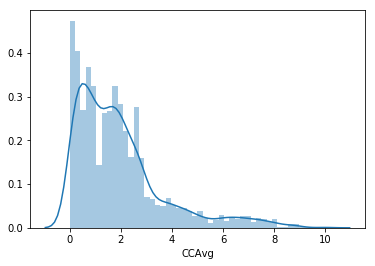

In [33]:
sns.distplot(data.CCAvg)
plt.show()

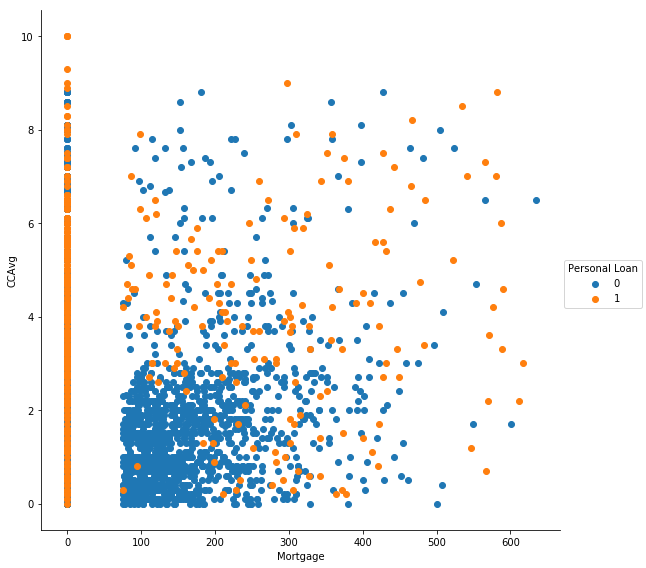

In [34]:
sns.FacetGrid(data,hue='Personal Loan',size=8)\
    .map(plt.scatter,"Mortgage","CCAvg")\
    .add_legend()
plt.show()

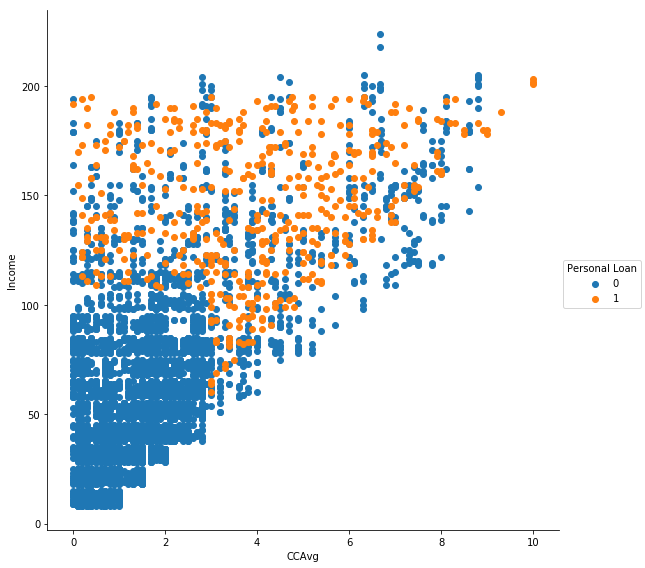

In [35]:
sns.FacetGrid(data,hue='Personal Loan',size=8)\
    .map(plt.scatter,"CCAvg","Income")\
    .add_legend()
plt.show()

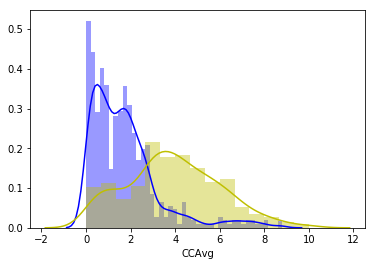

In [36]:
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'b')
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], color = 'y')
plt.show()

In [37]:
print('Credit card spending of Non-Loan customers: ',data[data['Personal Loan'] == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data['Personal Loan']== 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


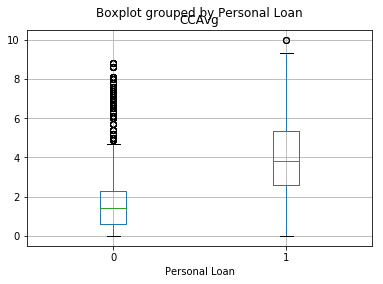

In [38]:
data.boxplot(column='CCAvg',by='Personal Loan')
plt.show()

Observation: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

**Age**

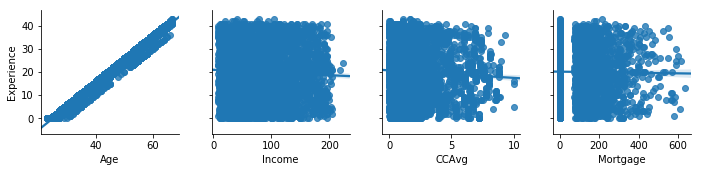

In [39]:
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(data, y_vars = 'Experience', x_vars = ncol)
grid.map(sns.regplot);

'Age' has a very strong association with 'Experience

In [40]:
data[['Experience','Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr()

,Experience,Personal Loan,Age,Income,CCAvg,Mortgage
Experience,1.000000,-0.007959,0.994229,-0.046840,-0.050001,-0.010907
Personal Loan,-0.007959,1.000000,-0.007726,0.502462,0.366891,0.142095
Age,0.994229,-0.007726,1.000000,-0.055269,-0.052030,-0.012539
Income,-0.046840,0.502462,-0.055269,1.000000,0.645993,0.206806
CCAvg,-0.050001,0.366891,-0.052030,0.645993,1.000000,0.109909
Mortgage,-0.010907,0.142095,-0.012539,0.206806,0.109909,1.000000


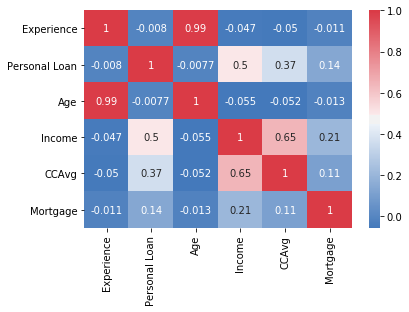

In [41]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(data[['Experience','Personal Loan', 'Age', 'Income', 'CCAvg', 'Mortgage']].corr(), cmap = cmap, annot = True);

**CD Account**

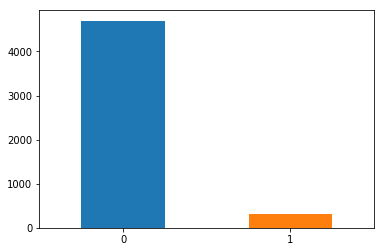

In [42]:
data['CD Account'].value_counts().plot(kind='bar',rot=0)
plt.show()

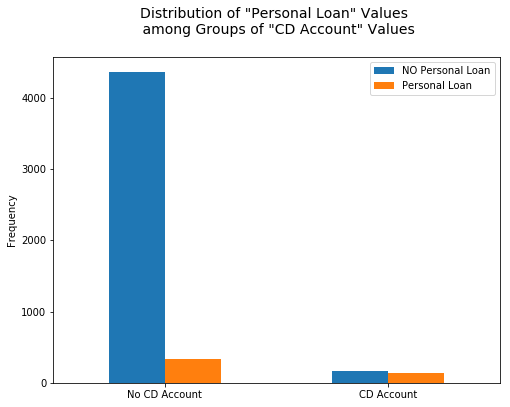

In [43]:
series_cd = data[data['Personal Loan'] == 1]['CD Account'].value_counts()
series_cdd = data[data['Personal Loan'] == 0]['CD Account'].value_counts()
pd.DataFrame(dict( NO_PL= series_cdd, PL= series_cd,)).plot.bar(figsize = (8,6))
plt.ylabel('Frequency')
plt.xticks(np.arange(2),('No CD Account','CD Account'), rotation = 'horizontal')
plt.legend(('NO Personal Loan', 'Personal Loan'));
plt.title('Distribution of "Personal Loan" Values \n among Groups of "CD Account" Values', fontsize = 14, y = 1.05);

We may say that the proportion of persons who has Personal Loan among them who has CD account with The Bank is quit high.
Let's see the exact number of proportion of "loanees" among "depositees"

In [44]:
data[data['CD Account']==1]['Personal Loan'].value_counts()

0    162
1    140
Name: Personal Loan, dtype: int64

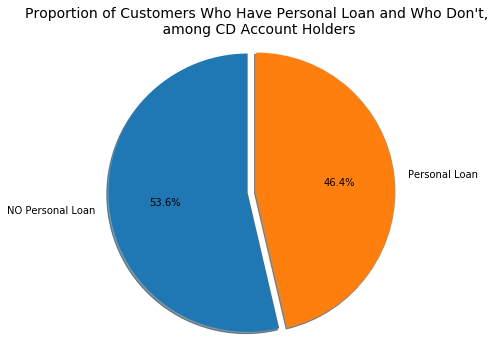

In [45]:
series = data[data['CD Account'] == 1]['Personal Loan'].value_counts()
plt.axis('equal')
plt.title('Proportion of Customers Who Have Personal Loan and Who Don\'t,\n among CD Account Holders', \
          fontsize = 14, y = 1.2)
labels = ['NO Personal Loan','Personal Loan']
plt.pie(series, labels = labels,autopct= '%1.1f%%', shadow = True,explode = (0.1, 0), radius = 1.6, startangle = 90)
plt.show()

- 46.4% of CD Account Holders have Perconal Loan.
- For 'CD Account' characteristic - the main segment to sell Personal Loan is the people who already have a CD Account with the Bank.
- Target value of 'CD Account' variable = 1

**Income and Education**

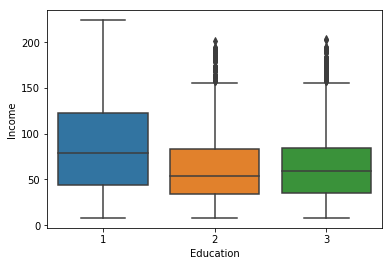

In [46]:
sns.boxplot(x='Education',y='Income',data=data)
plt.show()

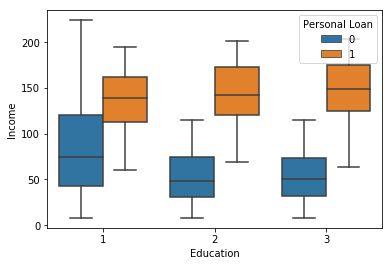

In [47]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)
plt.show()

Observation : It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

**Education**

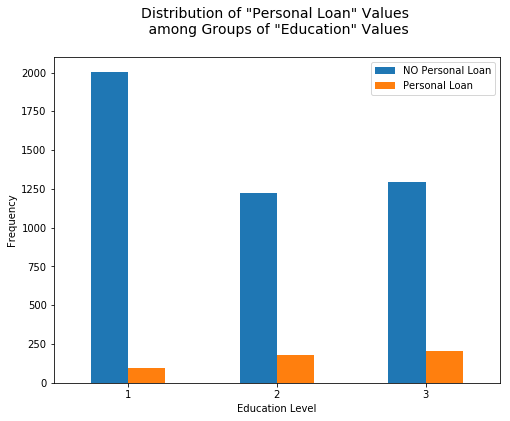

In [48]:
series_ed = data[data['Personal Loan'] == 1]['Education'].value_counts()
series_edd = data[data['Personal Loan'] == 0]['Education'].value_counts()
pd.DataFrame(dict(NO_PL= series_edd, PL= series_ed)).plot.bar(figsize = (8,6))
plt.ylabel('Frequency')
plt.xlabel('Education Level')
plt.xticks(np.arange(3),('1','2','3'), rotation = 'horizontal')
plt.legend(('NO Personal Loan', 'Personal Loan'))
plt.title('Distribution of "Personal Loan" Values \n among Groups of "Education" Values', fontsize = 14, y = 1.05);

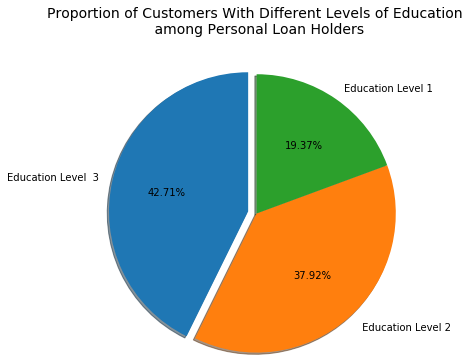

In [49]:
series_edu_4 = data[data['Personal Loan'] == 1]['Education'].value_counts()
plt.axis('equal')
plt.title('Proportion of Customers With Different Levels of Education \n among Personal Loan Holders', \
          fontsize = 14, y = 1.3)
labels = ['Education Level  3',' Education Level 2','Education Level 1']
plt.pie(series_edu_4, labels = labels, autopct= '%1.2f%%', shadow = True,explode = (0.1, 0, 0), radius = 1.6, startangle = 90);
plt.savefig('Proportion_edu_levels_among_PL.png', bbox_inches = 'tight');

**Conclusion**

- 42.7%  and 37.9% of persons who have Personal Loan, have Education level 3 and Level 2 respectively. 
- For 'Education' characteristic - the main segments to sell Personal Loan is the people who have Second and Third levels of education
- Target values of 'Education' variable are 3 and 2 in descending order of priority

**Securities Account**

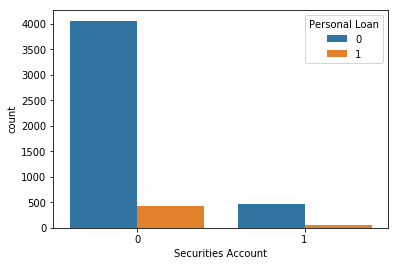

In [50]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")
plt.show()

Observation : Majority of customers who does not have loan have securities account

**Family**

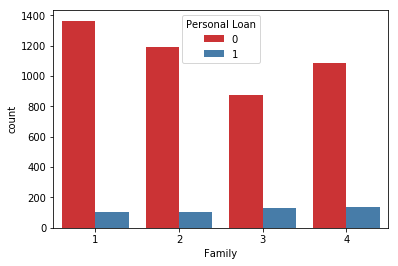

In [51]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')
plt.show()

Observation: Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

In [52]:
data[data['Personal Loan'] == 1]['Family'].value_counts()

4    134
3    133
1    107
2    106
Name: Family, dtype: int64

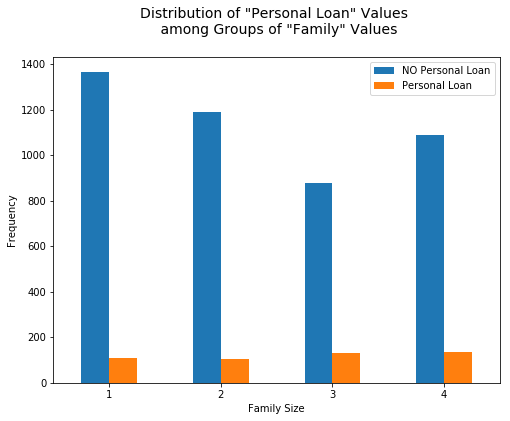

In [53]:
series_fam = data[data['Personal Loan'] == 1]['Family'].value_counts()
series_famm = data[data['Personal Loan'] == 0]['Family'].value_counts()
pd.DataFrame(dict( NO_PL = series_famm, PL= series_fam,)).plot.bar(figsize = (8,6))
plt.ylabel('Frequency')
plt.xlabel('Family Size')
plt.xticks(np.arange(4),('1', '2', '3', '4'), rotation = 'horizontal')
plt.legend(('NO Personal Loan', 'Personal Loan'));
plt.title('Distribution of "Personal Loan" Values \n among Groups of "Family" Values', fontsize = 14, y = 1.05);

- 27.9% and 27.7% of persons who have Personal Loan, have Family size 4 and Level 3 respectively. 
- For 'Family' characteristic - the main segments to sell Personal Loan is the people who have Family Size 3 and 4.
- Target values of 'Family' variable are 3 and 4 in descending order of priority, since the proportion of people who has Personal Loan is the higthest with Family Size 3 - 13,2%.

>**Summary of EDA**
<br>
### CD Account
> - 46.4% of CD Account Holders have Perconal Loan. 
> - For 'CD Account' characteristic - the main segment to sell Personal Loan is the people who already have a CD Account with the Bank.
> - **Target value of 'CD Account' variable:**
>> - **1**
<br>
### Education
> - 42.7%  and 37.9% of persons who have Personal Loan, have Education level 3 and Level 2 respectively. 
> - For 'Education' characteristic - the main segments to sell Personal Loan is the people who have Second and Third levels of education
> - **Target values of 'Education' variable in descending order of priority:**
>> - **3**
>> - **2**
<br>
### Family
> - 27.9%  and 27.7% of persons who have Personal Loan, have Family size 4 and Level 3 respectively. 
> - For 'Family' characteristic - the main segments to sell Personal Loan is the people who have Family Size 3 and 4.
> - **Target values of 'Family' variable in descending order of priority**, since the proportion of people who has Personal Loan is the higthest with Family Size 3 - 13,2%.
>> - **3**
>> - **4**
<br>
### CCAvg
> The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.
<br>
### Income
> - We observed that people having income more than 50 thousand dollars have taken personal loan.
- Out of people who have taken loan and have income more than 50 thousand dollars,65% of them do not have any mortgage value.
- We observe a linear trend with income for the people who have house mortgage value 

**Model Building**

In [54]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [55]:
X=data.drop(['ID','ZIP Code','Personal Loan'],axis=1)
Y=data['Personal Loan']

In [56]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.21.3.


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=101,test_size=0.25)
print(X_test.shape, y_test.shape)
print(X_train.shape, y_train.shape)

(1250, 11) (1250,)
(3750, 11) (3750,)


In [58]:
y_train.value_counts(normalize=True)

0    0.902133
1    0.097867
Name: Personal Loan, dtype: float64

In [59]:
y_test.value_counts(normalize=True)

0    0.9096
1    0.0904
Name: Personal Loan, dtype: float64

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

train_auc=[]
cv_auc=[]
depth= [3,4,5,6,7,8,9,10,11]
min_split=[2,10,20,50,100]
parameters={'criterion':['gini'],'max_depth':[3,4,5,6,7,8,9,10,11],'min_samples_split':[2,10,20,50,100]}
dt = DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters,cv=5,scoring='roc_auc')
clf.fit(X_train, y_train)

train_auc= clf.cv_results_
# train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [65]:
train_auc

{'mean_fit_time': array([0.00799761, 0.00799794, 0.00639734, 0.00879788, 0.00719781,
        0.00639839, 0.00639892, 0.00719805, 0.00639825, 0.00879793,
        0.00719843, 0.00559978, 0.0072    , 0.00560036, 0.00480089,
        0.0063992 , 0.00719819, 0.00640006, 0.00639911, 0.00559883,
        0.00720196, 0.01119614, 0.00719852, 0.00719891, 0.00639858,
        0.00719805, 0.00560923, 0.00638981, 0.00639777, 0.00560188,
        0.00720081, 0.00639601, 0.00639181, 0.00639968, 0.01039462,
        0.00639806, 0.00719147, 0.00720158, 0.00639729, 0.00639524,
        0.00800047, 0.01039567, 0.00640178, 0.00559239, 0.00559959]),
 'mean_score_time': array([0.00399919, 0.00319934, 0.00240021, 0.00319939, 0.00320001,
        0.00319881, 0.00239935, 0.00239949, 0.00319986, 0.00239944,
        0.00319924, 0.00239744, 0.0023982 , 0.00239739, 0.00319705,
        0.00239849, 0.0023994 , 0.00239768, 0.00239854, 0.00319858,
        0.00319505, 0.00400038, 0.00399833, 0.00159912, 0.00239935,
        0.

In [67]:
cv_auc
cv_auc_std

array([0.00262786, 0.00262786, 0.00262786, 0.00262786, 0.00262786,
       0.00339293, 0.00401092, 0.00387843, 0.00387843, 0.00280709,
       0.00578284, 0.00477589, 0.00462604, 0.00552582, 0.00278602,
       0.00742907, 0.00314817, 0.00306922, 0.00482008, 0.00276265,
       0.0084172 , 0.01018704, 0.00951571, 0.00828592, 0.00276265,
       0.01188215, 0.01204285, 0.01183367, 0.00828592, 0.00276265,
       0.00487147, 0.01135072, 0.01220062, 0.00828592, 0.00276265,
       0.00880059, 0.01124093, 0.01221026, 0.00828592, 0.00276265,
       0.00865664, 0.0112377 , 0.0121653 , 0.00828592, 0.00276265])

In [ ]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=depth,y=min_split,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=depth,y=min_split,z=cv_auc, name = 'Cross validation')
data1 = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='max_depth'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data1, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [68]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 100}

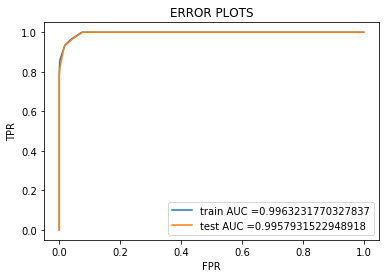

Train confusion matrix
[[3375    8]
 [  51  316]]
Test confusion matrix
[[1133    4]
 [  19   94]]


In [116]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

dt=DecisionTreeClassifier(max_depth=4,min_samples_split=100)
dt.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicte d outputs

train_fpr, train_tpr, thresholds = roc_curve(y_train, dt.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
train_precision, train_recall, thresholds1 = precision_recall_curve(y_train,dt.predict_proba(X_train)[:,1])
test_precision, test_recall, thresholds2 = precision_recall_curve(y_test,dt.predict_proba(X_test)[:,1])


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, dt.predict(X_train)))
print("Test confusion matrix")
print(confusion_matrix(y_test, dt.predict(X_test)))

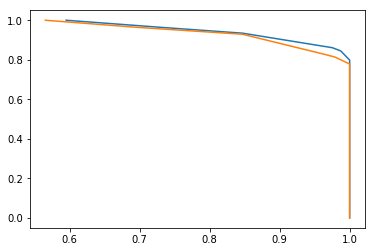

In [117]:
plt.plot(train_precision, train_recall)
plt.plot(test_precision, test_recall)

In [75]:
from sklearn import metrics
recall=metrics.recall_score(y_train,dt.predict(X_train))
recall_test=metrics.recall_score(y_test,dt.predict(X_test))
print(recall)
print(recall_test)

0.8610354223433242
0.831858407079646


In [102]:
p1=metrics.precision_score(y_test,dt.predict(X_test))
p1

0.9591836734693877

In [105]:
p2=metrics.precision_score(y_test,(pred_test))
p2

0.6942675159235668

In [123]:
f1_s2=metrics.f1_score(y_train,dt.predict(X_train))
f1_s2

0.9146164978292329

In [99]:
f1_s1=metrics.f1_score(y_test,dt.predict(X_test))
f1_s1

0.8909952606635071

In [101]:
f1_s2=metrics.f1_score(y_test,pred_test)
f1_s2

0.8074074074074074

In [77]:
print(metrics.classification_report(y_test,dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1137
           1       0.96      0.83      0.89       113

    accuracy                           0.98      1250
   macro avg       0.97      0.91      0.94      1250
weighted avg       0.98      0.98      0.98      1250



In [80]:
i = np.arange(len(train_tpr))

roc_like_df = pd.DataFrame({'falsepositiverate' : pd.Series(train_fpr, index=i),'sensitivity' : pd.Series(train_tpr, index = i), 
              'specificity' : pd.Series(1-train_fpr, index = i),'cutoff' : pd.Series(thresholds, index = i)})
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [81]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,cutoff,falsepositiverate,sensitivity,specificity,total
6,0.099237,0.073899,1.0,0.926101,1.926101


In [124]:
roc_like_df

,cutoff,falsepositiverate,sensitivity,specificity,total
0,2.000000,0.000000,0.000000,1.000000,1.000000
1,1.000000,0.000000,0.798365,1.000000,1.798365
2,0.809524,0.001182,0.844687,0.998818,1.843504
3,0.600000,0.002365,0.861035,0.997635,1.858671
4,0.333333,0.018327,0.934605,0.981673,1.916278
5,0.135802,0.039019,0.964578,0.960981,1.925559
6,0.099237,0.073899,1.000000,0.926101,1.926101
7,0.000000,1.000000,1.000000,0.000000,1.000000


In [121]:
i = np.arange(len(train_precision))

roc_f1_df = pd.DataFrame({'Precision' : pd.Series(train_precision),'Recall' : pd.Series(train_recall), 
             'cutoff' : pd.Series(thresholds1)})
roc_f1_df['F1-score'] = (roc_f1_df['Precision']+roc_f1_df['Recall'])/2*roc_f1_df['Precision']*roc_f1_df['Recall']

In [122]:
roc_f1_df

,Precision,Recall,cutoff,F1-score
0,0.594814,1.000000,0.099237,0.474308
1,0.728395,0.964578,0.135802,0.594736
2,0.846914,0.934605,0.333333,0.705062
3,0.975309,0.861035,0.600000,0.771058
4,0.987261,0.844687,0.809524,0.763855
5,1.000000,0.798365,1.000000,0.717876
6,1.000000,0.000000,NaN,0.000000


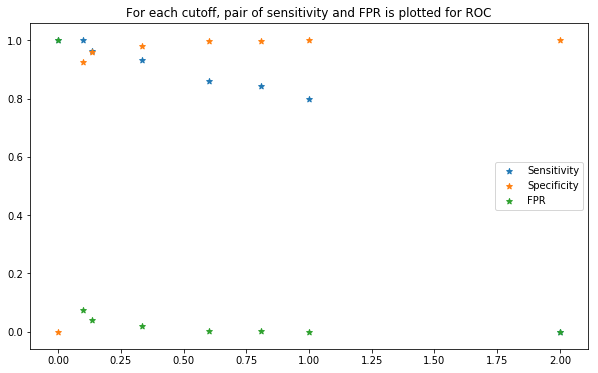

In [82]:
plt.subplots(figsize=(10,6))
plt.scatter(roc_like_df['cutoff'], roc_like_df['sensitivity'], marker='*', label='Sensitivity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['specificity'], marker='*', label='Specificity')
plt.scatter(roc_like_df['cutoff'], roc_like_df['falsepositiverate'], marker='*', label='FPR')
plt.title('For each cutoff, pair of sensitivity and FPR is plotted for ROC')
plt.legend()

plt.show()

In [96]:
bank= dt.predict_proba(X_test)[:,1]
pred_test=np.where(bank>0.099237,1,0)

In [97]:
print("Test confusion matrix")
print(confusion_matrix(y_test,pred_test))

Test confusion matrix
[[1089   48]
 [   4  109]]


In [98]:
recall_f=metrics.recall_score(y_test,pred_test)
recall_f

0.9646017699115044

In [126]:
pred_test

array([0, 1, 0, ..., 0, 0, 0])

In [136]:
bank_f=dt.predict_proba(X_test)[:,1]
pred_test_f=np.where(bank_f>0.9,1,0)
metrics.f1_score(y_test,pred_test_f)

0.8756218905472637

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

train_auc=[]
cv_auc=[]
estimators = [2,5,10,20,30,40,50]
min_samples= [2,5,10,50,100,500]
rf = RandomForestClassifier()
parameters={'n_estimators':[2,5,10,20,30,40,50],'min_samples_split':[2,5,10,50,100,500],'n_jobs':[-1]}
clf=GridSearchCV(rf,parameters,cv=3,scoring='roc_auc')
clf.fit(X_train,y_train)

train_auc = clf.cv_results_['mean_train_score']
train_std_auc=clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_std_auc=clf.cv_results_['std_test_score']

In [ ]:
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import numpy as np

# https://plot.ly/python/3d-axes/
trace1 = go.Scatter3d(x=estimators,y=min_samples,z=train_auc, name = 'train')
trace2 = go.Scatter3d(x=estimators,y=min_samples,z=cv_auc, name = 'Cross validation')
data2 = [trace1, trace2]

layout = go.Layout(scene = dict(
        xaxis = dict(title='n_estimators'),
        yaxis = dict(title='min_samples_split'),
        zaxis = dict(title='AUC'),))

fig = go.Figure(data=data2, layout=layout)
offline.iplot(fig, filename='3d-scatter-colorscale')

In [ ]:
from sklearn.metrics import roc_curve,auc
rf=RandomForestClassifier(n_estimators=30,min_samples_split=100)
rf.fit(X_train,y_train)

train_fpr,train_tpr,thresholds=roc_curve(y_train,rf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.show()

print("="*100)

from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, rf.predict(X_train)))
print("Test confusion matrix")
print(confusion_matrix(y_test, rf.predict(X_test)))

In [ ]:
35/(35+113)*100

In [ ]:
print("Train confusion matrix")
y_pred =  rf.predict(X_train)
conf_mat = confusion_matrix(y_train, y_pred)
sns.heatmap(conf_mat ,annot = True, fmt = "d", vmin = 0 , vmax = 50000)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
67/(265+67)*100

In [ ]:
conf_mat_test = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(conf_mat_test ,annot = True, fmt = "d", vmin = 0 , vmax = 50000)
plt.ylabel('True label')
plt.xlabel('Predicted label')
print("Test confusion matrix" )

In [ ]:
35/(113+35)*100  #accuracy should  be 100-erro%
#Error here should be our number of false negative

In [ ]:
dt.best_params_

In [ ]:
train=data.drop(['ID','ZIP Code','Personal Loan'],axis=1)

In [ ]:
data.columns

In [ ]:
test=data.drop(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],axis=1)

In [ ]:
test.columns

In [ ]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.show()

In [ ]:
!pip install pydot

In [ ]:
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.core.pylabtools import figsize
from IPython.display import Image
figsize(12.5, 6)
import pydot
# dot_data = StringIO()
tree.export_graphviz(dt,max_depth=3, out_file='dot_data.dot',feature_names=train.columns,filled=True,rounded=True)
# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png("dtree.png")
(graph,) = pydot.graph_from_dot_file('dot_data.dot')
graph.write_png('dctree.png')

In [ ]:
!dot -Tpng dot_data.dot -o dctree.png
image=plt.imread('dctree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

### Conclusion
The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. Four classification algorithms were used in this study. From the above graph , it seems like **Decision Tree** algorithm and Random forest algorithm both works fine.